# Retail Sales

### Project Overview

**Objective:** Build a regression model to predict the quantity of items a customer will purchase in a single transaction.

**Scope:** Investigate relationships between date,	gender,	age,	product category,	quantity,	price per unit,	and total amount.

In [56]:
#Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

### 1. Data Preparation

In [57]:
#Check if the file path exists
os.path.exists('./Data/retail_sales.csv')  

True

In [58]:
#Load dataset
rs_df = pd.read_csv("./Data/retail_sales.csv")

In [59]:
rs_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [60]:
#Number of rows and columns
rs_df.shape

(1000, 9)

In [61]:
#Identify missing values and data type for each column
rs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [62]:
#Check for null values
#How many missing (null) values are present in each column of the DataFrame
rs_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [63]:
#Check for duplicate rows
duplicates = rs_df.duplicated().sum()
duplicates

0

In [64]:
#Drop column 'Customer ID' and 'Transaction ID' as it is not relevant for the analysis
rs_df = rs_df.drop('Customer ID', axis=1)
rs_df = rs_df.drop('Transaction ID', axis=1)

### 2. Exploratory Data Analysis (EDA) 

In [65]:
rs_df.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


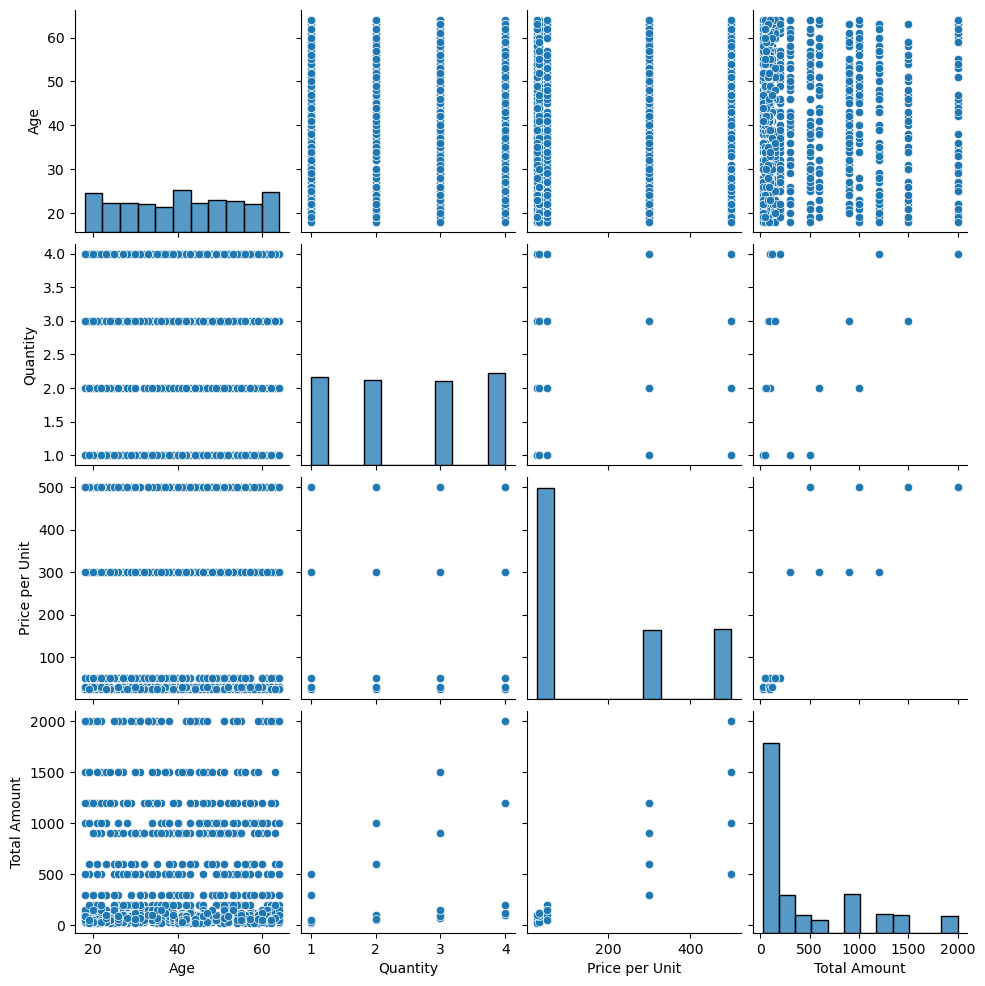

In [66]:
#Plot all the possible combinations
sns.pairplot(rs_df)
plt.show()

In [68]:
# Drop categorical variables for the correlation analysis
rs_df = rs_df.drop('Product Category', axis=1)
rs_df = rs_df.drop('Gender', axis=1)
rs_df = rs_df.drop('Date', axis=1)

In [71]:
#Calculate correlation
rs_corr = rs_df.corr()
rs_corr

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


<Axes: >

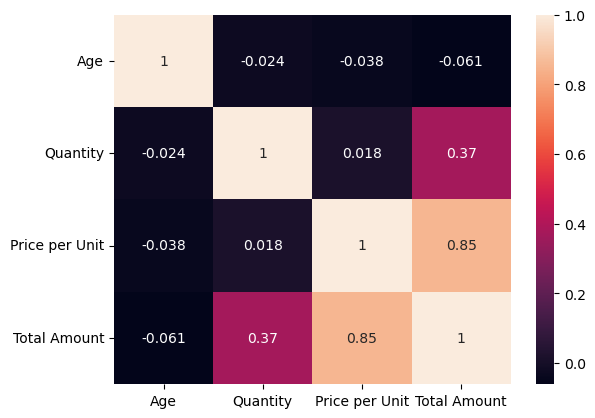

In [73]:
#Heatmap
ax=sns.heatmap(rs_corr, annot = True)
ax

#### Target variable *Purchase Amount*

<Axes: xlabel='Total Amount', ylabel='Count'>

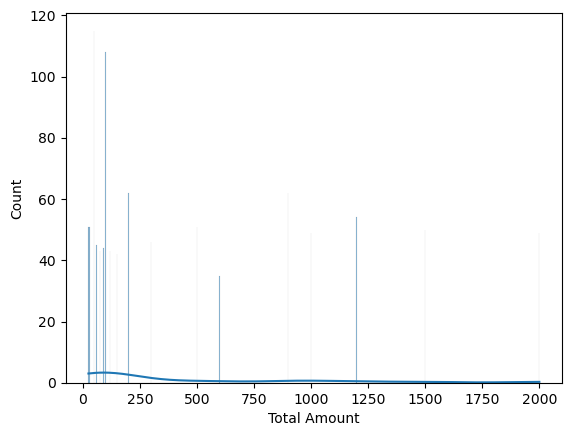

In [76]:
# Histogram and density function
sns.histplot(data = rs_df['Total Amount'] , binwidth=2 , kde = True )

<Axes: ylabel='Total Amount'>

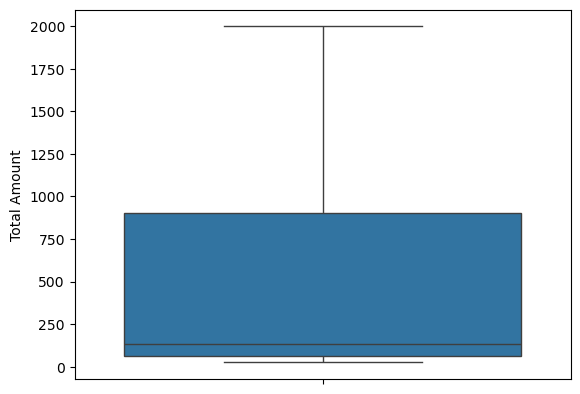

In [77]:
#Box PLot
sns.boxplot(data=rs_df, y='Total Amount')

### 3. Feature Engineering

In [ ]:
#Standardize columns

from sklearn.preprocessing import StandardScaler

#Initialize the StandardScaler
scaler = StandardScaler()

#specify the column that needs to be standarized
column_to_standardize = ['age','annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

#fit and transform the the column 'annul_income'
cpb_df[column_to_standardize] = scaler.fit_transform(cpb_df[column_to_standardize])

print(cpb_df)

One-hot encoding to 'Region' column

In [ ]:
#One-Hot encoding for the column 'Region' to create new binary columns for each unique region 

from sklearn.preprocessing import OneHotEncoder

#Initialize OneHot Encoder
encoder = OneHotEncoder(sparse_output=False)

#Apply encoding only to the 'region' column
region_encoded = encoder.fit_transform(cpb_df[['region']])


# Convert the encoded values into a DataFrame 
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['region']))


# Concatenate the original DataFrame (excluding 'region') with the new encoded columns
data = pd.concat([cpb_df.drop('region', axis=1), region_df], axis=1)

print(data.head())



In [ ]:
print(data.dtypes)

In [ ]:
#create a csv file to store the clean data
cpb_df.to_csv('processed_dataset.csv', index=False)